In [1]:
#import
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime
import os
import pickle
import seaborn as sns
import datetime as dt
from model import StockEnv,get_scaler, play_one_episode, LinearModel, DQNAgent
from tqdm.notebook import tqdm
import pyfolio as pf
%matplotlib inline

C:\Users\User\anaconda3\envs\MyDjango\lib\site-packages\pyfolio\pos.py:26: UserWarning: Module "zipline.assets" not found; mutltipliers will not be applied to position notionals.
  warnings.warn(


Stock name: LTC-USD
Start: 2021-01-22 17:00:00+00:00, End: 2021-03-22 14:30:00+00:00
Training data: 1336 
Tsesting data: 1337 


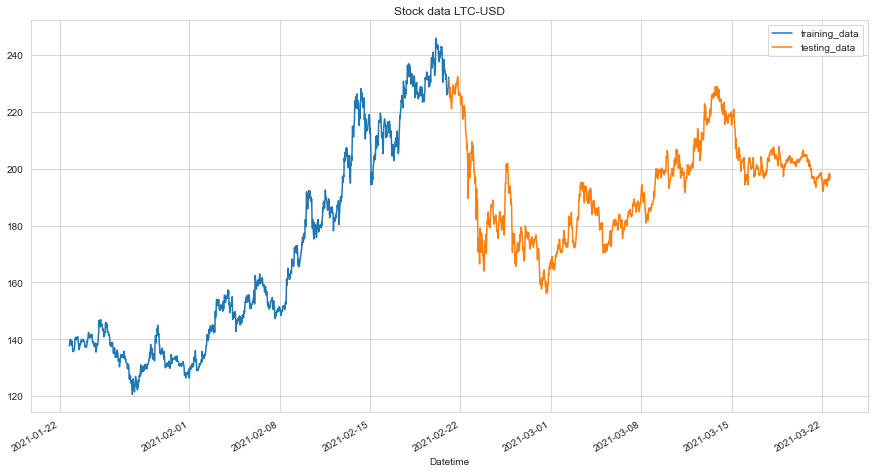

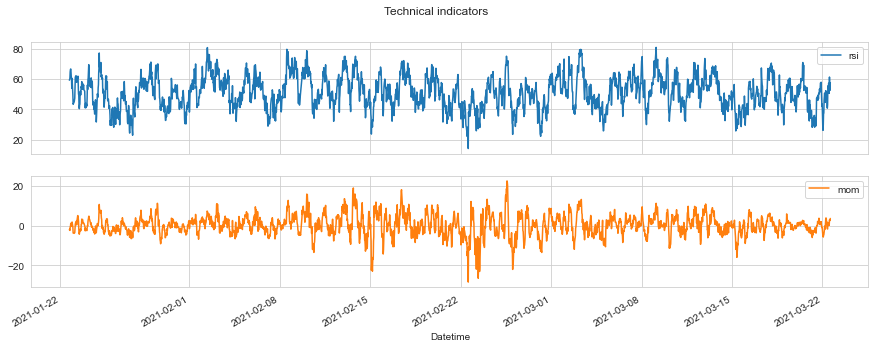

In [2]:
stock_name = 'ltc-usd'.upper()
industry = 'Cryptocurrency'
stock_data = pd.read_csv(f'data/{stock_name}.csv', index_col=['Datetime'], parse_dates=True)
n_train = len(stock_data)//2

train_data = stock_data.iloc[:n_train]
test_data = stock_data.iloc[n_train:]

print(f'Stock name: {stock_name}')
print(f'Start: {stock_data.index[0]}, End: {stock_data.index[-1]}')
print(f'Training data: {len(train_data)} ')
print(f'Tsesting data: {len(test_data)} ')

sns.set_style('whitegrid')
train_data['Adj Close'].plot(label='training_data', figsize=(15,8));
test_data['Adj Close'].plot(label='testing_data');
plt.title('Stock data '+ stock_name)
plt.legend();
plt.show()

stock_data[['rsi', 'mom']].plot(subplots=True, figsize=(15,5), title='Technical indicators');
plt.show()




In [3]:
num_episodes = 2000
batch_size = 32
capital = 1000
data = stock_data['Adj Close'].values
n_timesteps = data.shape[0]


env = StockEnv(train_data, capital)
state_size = env.state_dim
action_size = 2
agent = DQNAgent(state_size, action_size)
scaler = get_scaler(env)

  0%|          | 0/2000 [00:00<?, ?it/s]

episode: 1/2000, episode end value: 1243.42, duration: 0:00:00.334288
episode: 2/2000, episode end value: 1241.02, duration: 0:00:00.328080
episode: 3/2000, episode end value: 1240.43, duration: 0:00:00.332071
episode: 4/2000, episode end value: 1251.50, duration: 0:00:00.382085
episode: 5/2000, episode end value: 1251.72, duration: 0:00:00.356080
episode: 6/2000, episode end value: 1252.86, duration: 0:00:00.351075
episode: 7/2000, episode end value: 1256.55, duration: 0:00:00.360080
episode: 8/2000, episode end value: 1262.04, duration: 0:00:00.311070
episode: 9/2000, episode end value: 1248.05, duration: 0:00:00.281068
episode: 10/2000, episode end value: 1242.05, duration: 0:00:00.278063
episode: 11/2000, episode end value: 1253.48, duration: 0:00:00.351076
episode: 12/2000, episode end value: 1247.01, duration: 0:00:00.324071
episode: 13/2000, episode end value: 1248.31, duration: 0:00:00.306069
episode: 14/2000, episode end value: 1226.35, duration: 0:00:00.392120
episode: 15/200

episode: 117/2000, episode end value: 1253.91, duration: 0:00:00.398082
episode: 118/2000, episode end value: 1260.05, duration: 0:00:00.396096
episode: 119/2000, episode end value: 1261.74, duration: 0:00:00.368614
episode: 120/2000, episode end value: 1261.05, duration: 0:00:00.331307
episode: 121/2000, episode end value: 1258.87, duration: 0:00:00.332190
episode: 122/2000, episode end value: 1261.97, duration: 0:00:00.323071
episode: 123/2000, episode end value: 1264.62, duration: 0:00:00.321074
episode: 124/2000, episode end value: 1262.09, duration: 0:00:00.353081
episode: 125/2000, episode end value: 1265.78, duration: 0:00:00.353078
episode: 126/2000, episode end value: 1252.55, duration: 0:00:00.339074
episode: 127/2000, episode end value: 1256.97, duration: 0:00:00.341257
episode: 128/2000, episode end value: 1246.86, duration: 0:00:00.363456
episode: 129/2000, episode end value: 1261.89, duration: 0:00:00.320383
episode: 130/2000, episode end value: 1256.48, duration: 0:00:00

episode: 231/2000, episode end value: 1263.98, duration: 0:00:00.334071
episode: 232/2000, episode end value: 1260.32, duration: 0:00:00.381086
episode: 233/2000, episode end value: 1260.79, duration: 0:00:00.445099
episode: 234/2000, episode end value: 1261.96, duration: 0:00:00.506116
episode: 235/2000, episode end value: 1250.82, duration: 0:00:00.512120
episode: 236/2000, episode end value: 1261.25, duration: 0:00:00.447096
episode: 237/2000, episode end value: 1263.14, duration: 0:00:00.336075
episode: 238/2000, episode end value: 1251.78, duration: 0:00:00.365081
episode: 239/2000, episode end value: 1268.29, duration: 0:00:00.385086
episode: 240/2000, episode end value: 1259.15, duration: 0:00:00.365077
episode: 241/2000, episode end value: 1256.46, duration: 0:00:00.377086
episode: 242/2000, episode end value: 1248.45, duration: 0:00:00.439100
episode: 243/2000, episode end value: 1262.33, duration: 0:00:00.390091
episode: 244/2000, episode end value: 1268.49, duration: 0:00:00

episode: 345/2000, episode end value: 1257.80, duration: 0:00:00.419100
episode: 346/2000, episode end value: 1255.45, duration: 0:00:00.412090
episode: 347/2000, episode end value: 1263.54, duration: 0:00:00.399684
episode: 348/2000, episode end value: 1262.35, duration: 0:00:00.376350
episode: 349/2000, episode end value: 1253.90, duration: 0:00:00.318582
episode: 350/2000, episode end value: 1255.95, duration: 0:00:00.353084
episode: 351/2000, episode end value: 1252.81, duration: 0:00:00.364087
episode: 352/2000, episode end value: 1257.61, duration: 0:00:00.373082
episode: 353/2000, episode end value: 1264.25, duration: 0:00:00.367084
episode: 354/2000, episode end value: 1251.69, duration: 0:00:00.406090
episode: 355/2000, episode end value: 1269.11, duration: 0:00:00.335491
episode: 356/2000, episode end value: 1265.00, duration: 0:00:00.346137
episode: 357/2000, episode end value: 1260.85, duration: 0:00:00.365085
episode: 358/2000, episode end value: 1265.90, duration: 0:00:00

episode: 459/2000, episode end value: 1265.63, duration: 0:00:00.335081
episode: 460/2000, episode end value: 1255.29, duration: 0:00:00.361078
episode: 461/2000, episode end value: 1247.65, duration: 0:00:00.363080
episode: 462/2000, episode end value: 1249.23, duration: 0:00:00.386087
episode: 463/2000, episode end value: 1256.76, duration: 0:00:00.384085
episode: 464/2000, episode end value: 1247.27, duration: 0:00:00.367084
episode: 465/2000, episode end value: 1257.31, duration: 0:00:00.351077
episode: 466/2000, episode end value: 1255.33, duration: 0:00:00.335076
episode: 467/2000, episode end value: 1265.07, duration: 0:00:00.340076
episode: 468/2000, episode end value: 1253.57, duration: 0:00:00.368083
episode: 469/2000, episode end value: 1244.25, duration: 0:00:00.341077
episode: 470/2000, episode end value: 1261.07, duration: 0:00:00.384087
episode: 471/2000, episode end value: 1255.31, duration: 0:00:00.379085
episode: 472/2000, episode end value: 1263.07, duration: 0:00:00

episode: 573/2000, episode end value: 1252.55, duration: 0:00:00.360080
episode: 574/2000, episode end value: 1254.73, duration: 0:00:00.372122
episode: 575/2000, episode end value: 1266.95, duration: 0:00:00.378906
episode: 576/2000, episode end value: 1261.69, duration: 0:00:00.339605
episode: 577/2000, episode end value: 1254.77, duration: 0:00:00.359424
episode: 578/2000, episode end value: 1254.42, duration: 0:00:00.354657
episode: 579/2000, episode end value: 1260.71, duration: 0:00:00.354080
episode: 580/2000, episode end value: 1266.33, duration: 0:00:00.314069
episode: 581/2000, episode end value: 1263.58, duration: 0:00:00.331076
episode: 582/2000, episode end value: 1258.99, duration: 0:00:00.348078
episode: 583/2000, episode end value: 1254.38, duration: 0:00:00.361082
episode: 584/2000, episode end value: 1261.23, duration: 0:00:00.360085
episode: 585/2000, episode end value: 1262.94, duration: 0:00:00.324069
episode: 586/2000, episode end value: 1255.32, duration: 0:00:00

episode: 687/2000, episode end value: 1261.12, duration: 0:00:00.375080
episode: 688/2000, episode end value: 1263.67, duration: 0:00:00.372091
episode: 689/2000, episode end value: 1260.58, duration: 0:00:00.360081
episode: 690/2000, episode end value: 1252.31, duration: 0:00:00.383086
episode: 691/2000, episode end value: 1250.90, duration: 0:00:00.419093
episode: 692/2000, episode end value: 1258.49, duration: 0:00:00.501115
episode: 693/2000, episode end value: 1269.70, duration: 0:00:00.341076
episode: 694/2000, episode end value: 1265.38, duration: 0:00:00.355082
episode: 695/2000, episode end value: 1264.61, duration: 0:00:00.352079
episode: 696/2000, episode end value: 1255.66, duration: 0:00:00.329076
episode: 697/2000, episode end value: 1261.63, duration: 0:00:00.364081
episode: 698/2000, episode end value: 1258.22, duration: 0:00:00.445106
episode: 699/2000, episode end value: 1259.75, duration: 0:00:00.350071
episode: 700/2000, episode end value: 1259.64, duration: 0:00:00

episode: 801/2000, episode end value: 1245.02, duration: 0:00:00.413095
episode: 802/2000, episode end value: 1266.77, duration: 0:00:00.444098
episode: 803/2000, episode end value: 1252.46, duration: 0:00:00.465099
episode: 804/2000, episode end value: 1250.06, duration: 0:00:00.436099
episode: 805/2000, episode end value: 1257.92, duration: 0:00:00.502110
episode: 806/2000, episode end value: 1262.83, duration: 0:00:00.497109
episode: 807/2000, episode end value: 1239.95, duration: 0:00:00.505114
episode: 808/2000, episode end value: 1262.50, duration: 0:00:00.530604
episode: 809/2000, episode end value: 1245.27, duration: 0:00:00.471612
episode: 810/2000, episode end value: 1262.40, duration: 0:00:00.419092
episode: 811/2000, episode end value: 1262.65, duration: 0:00:00.436092
episode: 812/2000, episode end value: 1259.31, duration: 0:00:00.394092
episode: 813/2000, episode end value: 1257.56, duration: 0:00:00.369082
episode: 814/2000, episode end value: 1265.87, duration: 0:00:00

episode: 915/2000, episode end value: 1254.25, duration: 0:00:00.404089
episode: 916/2000, episode end value: 1264.68, duration: 0:00:00.393091
episode: 917/2000, episode end value: 1259.53, duration: 0:00:00.366081
episode: 918/2000, episode end value: 1263.87, duration: 0:00:00.327075
episode: 919/2000, episode end value: 1254.93, duration: 0:00:00.363082
episode: 920/2000, episode end value: 1257.14, duration: 0:00:00.400089
episode: 921/2000, episode end value: 1250.02, duration: 0:00:00.379087
episode: 922/2000, episode end value: 1259.63, duration: 0:00:00.456102
episode: 923/2000, episode end value: 1256.76, duration: 0:00:00.417093
episode: 924/2000, episode end value: 1258.69, duration: 0:00:00.423096
episode: 925/2000, episode end value: 1261.98, duration: 0:00:00.381087
episode: 926/2000, episode end value: 1258.17, duration: 0:00:00.459103
episode: 927/2000, episode end value: 1259.89, duration: 0:00:00.345079
episode: 928/2000, episode end value: 1255.31, duration: 0:00:00

episode: 1029/2000, episode end value: 1260.32, duration: 0:00:00.360079
episode: 1030/2000, episode end value: 1257.73, duration: 0:00:00.332077
episode: 1031/2000, episode end value: 1262.89, duration: 0:00:00.383083
episode: 1032/2000, episode end value: 1247.61, duration: 0:00:00.413090
episode: 1033/2000, episode end value: 1265.71, duration: 0:00:00.355083
episode: 1034/2000, episode end value: 1255.65, duration: 0:00:00.380083
episode: 1035/2000, episode end value: 1260.29, duration: 0:00:00.399090
episode: 1036/2000, episode end value: 1262.81, duration: 0:00:00.338075
episode: 1037/2000, episode end value: 1256.37, duration: 0:00:00.365080
episode: 1038/2000, episode end value: 1260.35, duration: 0:00:00.353080
episode: 1039/2000, episode end value: 1262.02, duration: 0:00:00.355081
episode: 1040/2000, episode end value: 1259.93, duration: 0:00:00.371083
episode: 1041/2000, episode end value: 1245.42, duration: 0:00:00.356078
episode: 1042/2000, episode end value: 1260.09, dur

episode: 1142/2000, episode end value: 1254.51, duration: 0:00:00.377091
episode: 1143/2000, episode end value: 1265.77, duration: 0:00:00.338070
episode: 1144/2000, episode end value: 1263.73, duration: 0:00:00.366594
episode: 1145/2000, episode end value: 1261.34, duration: 0:00:00.373538
episode: 1146/2000, episode end value: 1260.44, duration: 0:00:00.334478
episode: 1147/2000, episode end value: 1257.13, duration: 0:00:00.353035
episode: 1148/2000, episode end value: 1254.60, duration: 0:00:00.358078
episode: 1149/2000, episode end value: 1249.59, duration: 0:00:00.330073
episode: 1150/2000, episode end value: 1255.83, duration: 0:00:00.353084
episode: 1151/2000, episode end value: 1261.67, duration: 0:00:00.369084
episode: 1152/2000, episode end value: 1261.14, duration: 0:00:00.330070
episode: 1153/2000, episode end value: 1258.22, duration: 0:00:00.316071
episode: 1154/2000, episode end value: 1265.43, duration: 0:00:00.367081
episode: 1155/2000, episode end value: 1248.28, dur

episode: 1255/2000, episode end value: 1259.09, duration: 0:00:00.331077
episode: 1256/2000, episode end value: 1262.50, duration: 0:00:00.353085
episode: 1257/2000, episode end value: 1261.81, duration: 0:00:00.306065
episode: 1258/2000, episode end value: 1250.60, duration: 0:00:00.466107
episode: 1259/2000, episode end value: 1254.16, duration: 0:00:00.511107
episode: 1260/2000, episode end value: 1253.13, duration: 0:00:00.393087
episode: 1261/2000, episode end value: 1244.33, duration: 0:00:00.439098
episode: 1262/2000, episode end value: 1261.12, duration: 0:00:00.439098
episode: 1263/2000, episode end value: 1258.43, duration: 0:00:00.360081
episode: 1264/2000, episode end value: 1259.78, duration: 0:00:00.339076
episode: 1265/2000, episode end value: 1254.27, duration: 0:00:00.302069
episode: 1266/2000, episode end value: 1254.93, duration: 0:00:00.313067
episode: 1267/2000, episode end value: 1255.86, duration: 0:00:00.330076
episode: 1268/2000, episode end value: 1257.53, dur

episode: 1368/2000, episode end value: 1264.44, duration: 0:00:00.319080
episode: 1369/2000, episode end value: 1261.88, duration: 0:00:00.294069
episode: 1370/2000, episode end value: 1264.01, duration: 0:00:00.271046
episode: 1371/2000, episode end value: 1262.49, duration: 0:00:00.278061
episode: 1372/2000, episode end value: 1253.09, duration: 0:00:00.276063
episode: 1373/2000, episode end value: 1261.30, duration: 0:00:00.278063
episode: 1374/2000, episode end value: 1259.47, duration: 0:00:00.273064
episode: 1375/2000, episode end value: 1259.10, duration: 0:00:00.307066
episode: 1376/2000, episode end value: 1262.86, duration: 0:00:00.281061
episode: 1377/2000, episode end value: 1249.34, duration: 0:00:00.311070
episode: 1378/2000, episode end value: 1262.86, duration: 0:00:00.292068
episode: 1379/2000, episode end value: 1259.35, duration: 0:00:00.270059
episode: 1380/2000, episode end value: 1261.62, duration: 0:00:00.287674
episode: 1381/2000, episode end value: 1259.47, dur

episode: 1481/2000, episode end value: 1260.13, duration: 0:00:00.277061
episode: 1482/2000, episode end value: 1254.49, duration: 0:00:00.263058
episode: 1483/2000, episode end value: 1252.49, duration: 0:00:00.264062
episode: 1484/2000, episode end value: 1258.01, duration: 0:00:00.260056
episode: 1485/2000, episode end value: 1264.41, duration: 0:00:00.265054
episode: 1486/2000, episode end value: 1252.25, duration: 0:00:00.284073
episode: 1487/2000, episode end value: 1254.48, duration: 0:00:00.307062
episode: 1488/2000, episode end value: 1250.89, duration: 0:00:00.294067
episode: 1489/2000, episode end value: 1253.89, duration: 0:00:00.267059
episode: 1490/2000, episode end value: 1265.63, duration: 0:00:00.295067
episode: 1491/2000, episode end value: 1258.74, duration: 0:00:00.253055
episode: 1492/2000, episode end value: 1256.61, duration: 0:00:00.268059
episode: 1493/2000, episode end value: 1254.14, duration: 0:00:00.279080
episode: 1494/2000, episode end value: 1260.75, dur

episode: 1594/2000, episode end value: 1262.57, duration: 0:00:00.257057
episode: 1595/2000, episode end value: 1250.83, duration: 0:00:00.250049
episode: 1596/2000, episode end value: 1254.07, duration: 0:00:00.262062
episode: 1597/2000, episode end value: 1257.00, duration: 0:00:00.250060
episode: 1598/2000, episode end value: 1251.15, duration: 0:00:00.261072
episode: 1599/2000, episode end value: 1254.58, duration: 0:00:00.272054
episode: 1600/2000, episode end value: 1252.92, duration: 0:00:00.260046
episode: 1601/2000, episode end value: 1267.83, duration: 0:00:00.262047
episode: 1602/2000, episode end value: 1261.29, duration: 0:00:00.238068
episode: 1603/2000, episode end value: 1251.79, duration: 0:00:00.260063
episode: 1604/2000, episode end value: 1257.97, duration: 0:00:00.277048
episode: 1605/2000, episode end value: 1256.27, duration: 0:00:00.262071
episode: 1606/2000, episode end value: 1260.81, duration: 0:00:00.293067
episode: 1607/2000, episode end value: 1264.57, dur

episode: 1707/2000, episode end value: 1259.52, duration: 0:00:00.273061
episode: 1708/2000, episode end value: 1250.94, duration: 0:00:00.259057
episode: 1709/2000, episode end value: 1255.77, duration: 0:00:00.245041
episode: 1710/2000, episode end value: 1254.31, duration: 0:00:00.269061
episode: 1711/2000, episode end value: 1265.61, duration: 0:00:00.255056
episode: 1712/2000, episode end value: 1261.09, duration: 0:00:00.236061
episode: 1713/2000, episode end value: 1251.85, duration: 0:00:00.257059
episode: 1714/2000, episode end value: 1255.25, duration: 0:00:00.249055
episode: 1715/2000, episode end value: 1260.64, duration: 0:00:00.247055
episode: 1716/2000, episode end value: 1260.23, duration: 0:00:00.254072
episode: 1717/2000, episode end value: 1258.93, duration: 0:00:00.238037
episode: 1718/2000, episode end value: 1254.61, duration: 0:00:00.242055
episode: 1719/2000, episode end value: 1258.08, duration: 0:00:00.254057
episode: 1720/2000, episode end value: 1260.87, dur

episode: 1820/2000, episode end value: 1262.58, duration: 0:00:00.247059
episode: 1821/2000, episode end value: 1265.40, duration: 0:00:00.279049
episode: 1822/2000, episode end value: 1250.12, duration: 0:00:00.259074
episode: 1823/2000, episode end value: 1266.91, duration: 0:00:00.262067
episode: 1824/2000, episode end value: 1251.74, duration: 0:00:00.277051
episode: 1825/2000, episode end value: 1265.69, duration: 0:00:00.288063
episode: 1826/2000, episode end value: 1253.32, duration: 0:00:00.264072
episode: 1827/2000, episode end value: 1265.00, duration: 0:00:00.262049
episode: 1828/2000, episode end value: 1259.16, duration: 0:00:00.261059
episode: 1829/2000, episode end value: 1251.79, duration: 0:00:00.262059
episode: 1830/2000, episode end value: 1257.15, duration: 0:00:00.269059
episode: 1831/2000, episode end value: 1249.13, duration: 0:00:00.264064
episode: 1832/2000, episode end value: 1263.49, duration: 0:00:00.288061
episode: 1833/2000, episode end value: 1260.64, dur

episode: 1933/2000, episode end value: 1257.05, duration: 0:00:00.300065
episode: 1934/2000, episode end value: 1265.71, duration: 0:00:00.263051
episode: 1935/2000, episode end value: 1253.43, duration: 0:00:00.270061
episode: 1936/2000, episode end value: 1260.73, duration: 0:00:00.258075
episode: 1937/2000, episode end value: 1260.70, duration: 0:00:00.261041
episode: 1938/2000, episode end value: 1262.12, duration: 0:00:00.245068
episode: 1939/2000, episode end value: 1267.54, duration: 0:00:00.250055
episode: 1940/2000, episode end value: 1264.63, duration: 0:00:00.245049
episode: 1941/2000, episode end value: 1253.82, duration: 0:00:00.270057
episode: 1942/2000, episode end value: 1257.44, duration: 0:00:00.259068
episode: 1943/2000, episode end value: 1258.48, duration: 0:00:00.287071
episode: 1944/2000, episode end value: 1266.78, duration: 0:00:00.254056
episode: 1945/2000, episode end value: 1260.59, duration: 0:00:00.274063
episode: 1946/2000, episode end value: 1255.96, dur

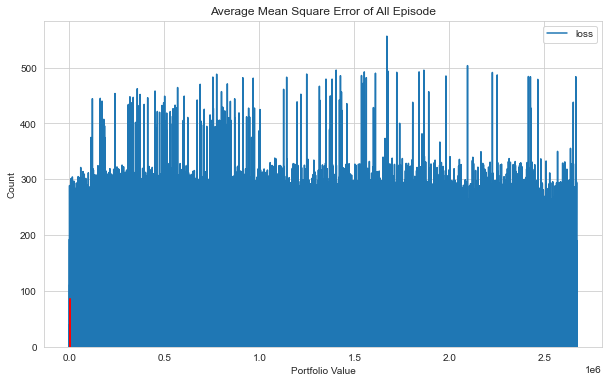

In [4]:
#train


mode = 'train'

portfolio_value = []



for e in tqdm(range(num_episodes)):
    t0 = datetime.now()
    val = play_one_episode(agent, env, mode, scaler)
    dt = datetime.now() - t0
    print(f"episode: {e + 1}/{num_episodes}, episode end value: {val['portfolio_value'][-1]:.2f}, duration: {dt}")
    portfolio_value.append(val['portfolio_value'][-1]) 


if mode == 'train':
    # save the DQN
    agent.save(f'state_dict/{stock_name}.npz')

    # save the scaler
    with open(f'scaler/{stock_name}.pkl', 'wb') as f:
        pickle.dump(scaler, f)

    # plot losses
    loss = agent.model.losses
    losses = pd.DataFrame(loss, columns=['loss'])
    losses.plot(figsize=(10,6))
    plt.title('Average Mean Square Error of All Episode')
    plt.xlabel('Step')
    plt.ylabel('Mean Square Error')

print(f'average reward: {np.mean(portfolio_value):.2f}, min: {np.min(portfolio_value):.2f}, max: {np.max(portfolio_value):.2f}')
sns.histplot(portfolio_value, bins=100, color='r', kde=True);
plt.xlabel('Portfolio Value');
plt.ylabel('Count');

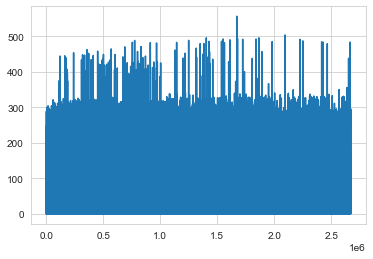

In [5]:
plt.plot(agent.model.losses)

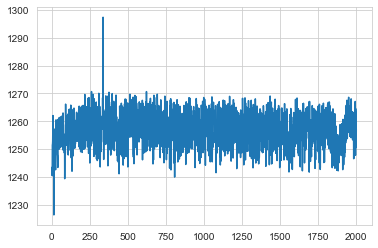

In [6]:
plt.plot(portfolio_value)

episode end value: 1067.69, duration: 0:00:00.196046
Sell: 690 times, Buy: 646 times


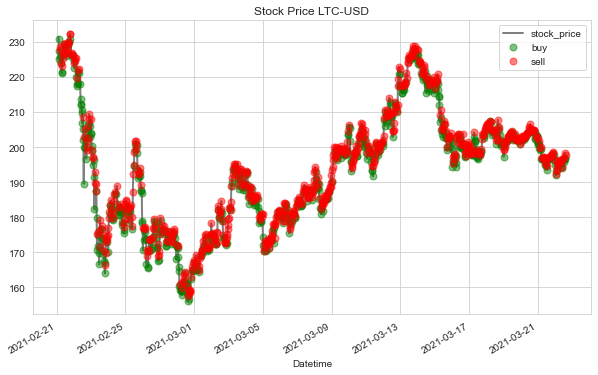

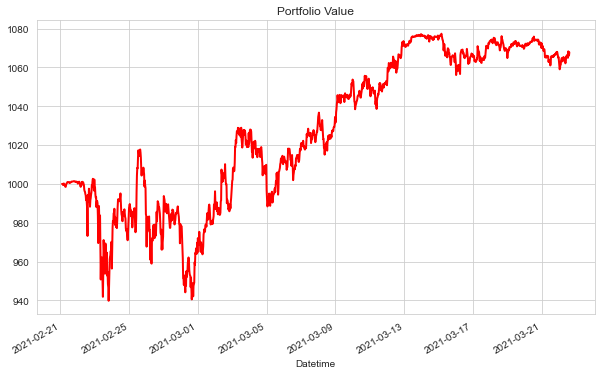

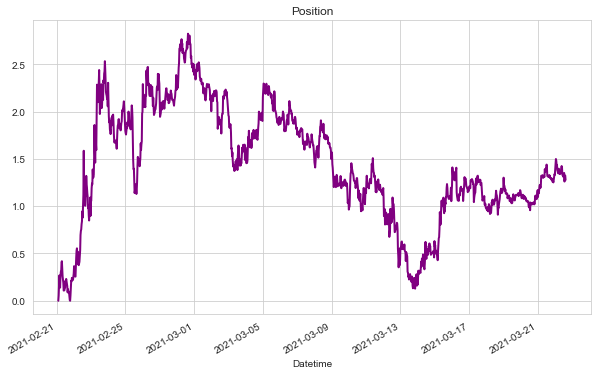

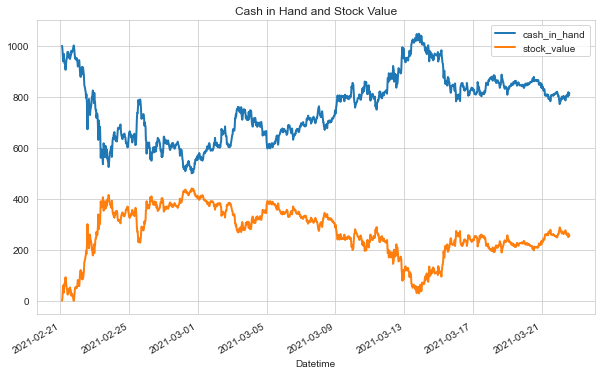

In [7]:
#test

mode = 'test'

portfolio_value = []


with open(f'scaler/{stock_name}.pkl', 'rb') as f:
    scaler = pickle.load(f)
    
env = StockEnv(test_data, capital)
agent.epsilon = 0
agent.load(f'state_dict/{stock_name}.npz')



t0 = datetime.now()
val = play_one_episode(agent, env, mode, scaler)
dt = datetime.now() - t0
print(f"episode end value: {val['portfolio_value'][-1]:.2f}, duration: {dt}")
portfolio_value.append(val['portfolio_value'][-1])
    
print(f"Sell: {env.sell_buy.count('sell')} times, Buy: {env.sell_buy.count('buy')} times")



result = pd.DataFrame(val)
result.index = test_data.index

def marker_buy(col):
    price = col[0] 
    sellbuy = col[1]
    
    if sellbuy == 'buy':
        return price
    else:
        return np.nan
    
def marker_sell(col):
    price = col[0] 
    sellbuy = col[1]
    
    if sellbuy == 'sell':
        return price
    else:
        return np.nan
    
result['marker_buy'] = result[['stock_price', 'sell_buy']].apply(marker_buy, axis=1);
result['marker_sell'] = result[['stock_price', 'sell_buy']].apply(marker_sell, axis=1);

result['stock_price'].plot(figsize=(10,6), c='grey', lw=2);
result['marker_buy'].plot(style='o', ms=7, label='buy', c='g', alpha=0.5);
result['marker_sell'].plot(style='o', ms=7, label='sell', c='r', alpha=0.5);
plt.title('Stock Price '+ stock_name)
plt.legend();
plt.show()



result['portfolio_value'].plot(figsize=(10,6), c='r', lw=2);
plt.title('Portfolio Value');
plt.show()

result['stock_owned'].plot(figsize=(10,6), c='purple', lw=2);
plt.title('Position')
plt.show()

result[['cash_in_hand', 'stock_value']].plot(figsize=(10,6), lw=2);
plt.title('Cash in Hand and Stock Value');
plt.show()

In [8]:


def CAGR(DF):
    df = DF.copy()
    try:
        df['daily_ret'] = df['portfolio_value'].pct_change()
    except:
        df['daily_ret'] = df['Adj Close'].pct_change() 
    
    df['cumulative_ret'] = (1 + df['daily_ret']).cumprod()
    n = len(df)/252
    cagr = (df['cumulative_ret'][-1])**(1/n) - 1
    return cagr

def volatility(DF):
    df = DF.copy()
    try:
        df['daily_ret'] = df['portfolio_value'].pct_change()
    except:
        df['daily_ret'] = df['Adj Close'].pct_change() 
    vol = df['daily_ret'].std() * np.sqrt(252)
    return vol


def sharpe(DF, rf):
    df = DF.copy()
    sr = (CAGR(df) - rf)/volatility(df)
    return sr

def max_dd(DF):
    df = DF.copy()
    try:
        df['daily_ret'] = df['portfolio_value'].pct_change()
    except:
        df['daily_ret'] = df['Adj Close'].pct_change() 
    df['cumulative_ret'] = (1 + df['daily_ret']).cumprod()
    df['cum_roll_max'] = df['cumulative_ret'].cummax()
    df['drawdown'] = df['cum_roll_max'] - df['cumulative_ret']
    df['drawdown_pct'] = df['drawdown']/df['cum_roll_max']
    max_dd = df['drawdown_pct'].max()
    return max_dd

def calmer(DF):
    df = DF.copy()
    clmr = CAGR(df)/max_dd(df)
    return clmr



print(f'Stock name: {stock_name}')
print(f'Start: {result.index[0]}  End: {result.index[-1]}')
print(f'Compound Annual Growth Rate: {CAGR(result)*100:.2f} %')
print(f'Volatility: {volatility(result):.4f}')
print(f'shape ratio: {sharpe(result, 0.011):.4f}')
print(f'Maximun drawdown: {max_dd(result)*-100:.2f} %')
print(f'Calmar ratio: {calmer(result):.4f}')
print('-----------------------------------------------------------')
print('-----------------------------------------------------------')
print('Comparing with Adj close')
print(f'Compound Annual Growth Rate (Adj close): {CAGR(test_data)*100:.2f} %')
print(f'Volatility (benchmark): {volatility(test_data):.4f}')
print(f'shape ratio: {sharpe(test_data, 0.011):.4f}')
print(f'Maximun drawdown: {max_dd(test_data)*-100:.2f} %')
print(f'Calmar ratio (benchmark): {calmer(test_data):.4f}')

Stock name: LTC-USD
Start: 2021-02-21 02:30:00+00:00  End: 2021-03-22 14:30:00+00:00
Compound Annual Growth Rate: 1.24 %
Volatility: 0.0506
shape ratio: 0.0281
Maximun drawdown: -7.58 %
Calmar ratio: 0.1638
-----------------------------------------------------------
-----------------------------------------------------------
Comparing with Adj close
Compound Annual Growth Rate (Adj close): -2.91 %
Volatility (benchmark): 0.1608
shape ratio: -0.2495
Maximun drawdown: -32.79 %
Calmar ratio (benchmark): -0.0888


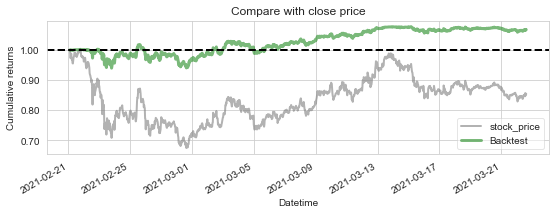

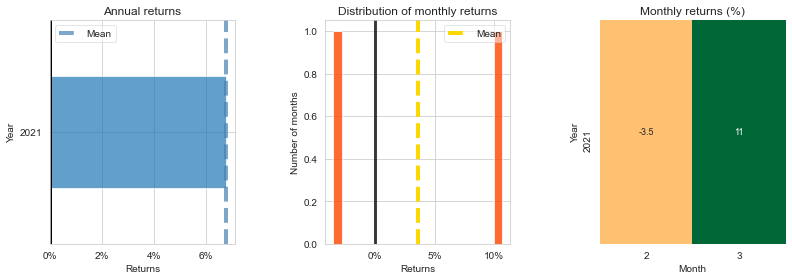

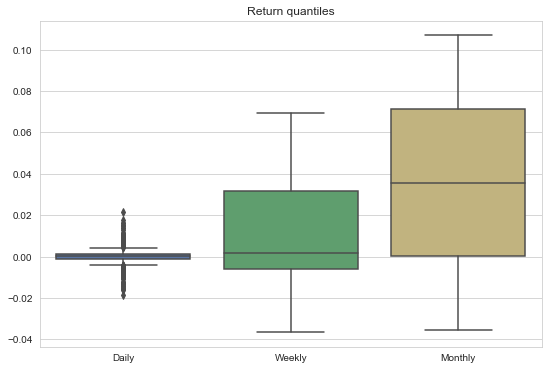

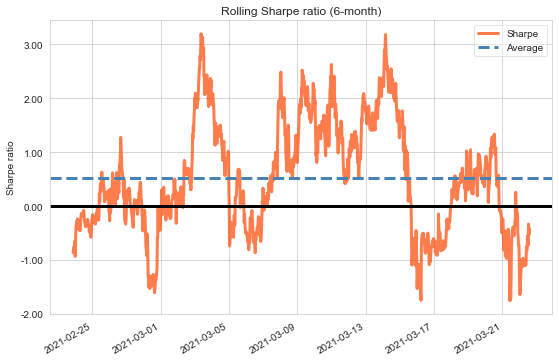

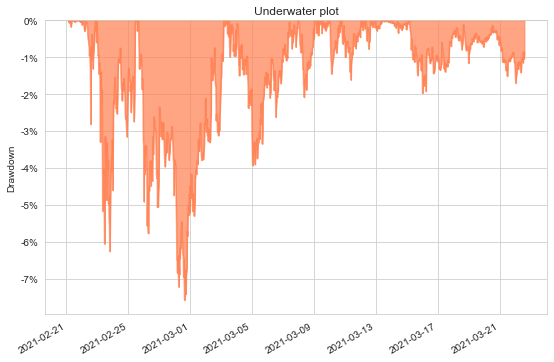

In [9]:


bt_returns = result['portfolio_value'].pct_change()
price = result['stock_price'].pct_change()



plt.figure(figsize=(9,6));
plt.subplot(2,1,1);
pf.plotting.plot_rolling_returns(bt_returns, price);
plt.title('Compare with close price');
plt.show()

fig = plt.figure(1)
plt.subplot(1,3,1)
pf.plot_annual_returns(bt_returns)
plt.subplot(1,3,2)
pf.plot_monthly_returns_dist(bt_returns)
plt.subplot(1,3,3)
pf.plot_monthly_returns_heatmap(bt_returns)
plt.tight_layout()
fig.set_size_inches(12,4)

plt.figure(figsize=(9,6))
pf.plot_return_quantiles(bt_returns);



plt.figure(figsize=(9,6))
pf.plot_rolling_sharpe(bt_returns);

plt.figure(figsize=(9,6))
pf.plot_drawdown_underwater(bt_returns);

score = (sharpe(result, 0.011) - sharpe(test_data, 0.011))*10
ret = ((result['portfolio_value'][-1] - result['portfolio_value'][0])/result['portfolio_value'][0]) * 100
with open(f'score/{stock_name}.pkl', 'wb') as f:  # Python 3: open(..., 'wb')
    pickle.dump([stock_name, industry,score, ret], f)
    
    
result.to_csv(f'../data/{stock_name}.csv')